### Hand Index Finger Detection with MediaPipe

MediaPipe offers a robust solution for hand index finger detection, making it one of the best choices for this task. Here's why:

1. **Accuracy**: MediaPipe employs state-of-the-art machine learning models and algorithms, ensuring high accuracy in hand index finger detection. The models are trained on large datasets, enabling them to accurately identify index fingers even in complex environments.

2. **Real-Time Performance**: MediaPipe is optimized for real-time performance, allowing for seamless hand index finger detection in live video streams or camera feeds. Its efficient implementation ensures low latency, making it suitable for interactive applications.

3. **Flexibility**: MediaPipe provides a flexible pipeline architecture that allows developers to customize and fine-tune the hand index finger detection process according to their specific requirements. This flexibility enables the integration of additional functionalities or optimizations as needed.

4. **Cross-Platform Support**: MediaPipe is designed to work across various platforms, including mobile devices, laptops, and desktop computers. This cross-platform support ensures that hand index finger detection can be deployed on a wide range of devices, making it accessible to a broader audience.

5. **Easy Integration**: MediaPipe offers straightforward integration with existing projects or applications. Its modular design and well-documented APIs simplify the process of incorporating hand index finger detection into different software projects, reducing development time and effort.

6. **Community and Support**: MediaPipe benefits from being developed and maintained by Google, ensuring ongoing support and updates. Additionally, it has a thriving community of developers who contribute to its ecosystem, providing resources, tutorials, and assistance to fellow users.

Overall, MediaPipe stands out as an excellent choice for hand index finger detection, thanks to its combination of accuracy, real-time performance, flexibility, cross-platform support, easy integration, and strong community support. Developers looking to implement hand index finger detection in their projects can rely on MediaPipe to deliver reliable and efficient results.
cratch.


# Sample Image
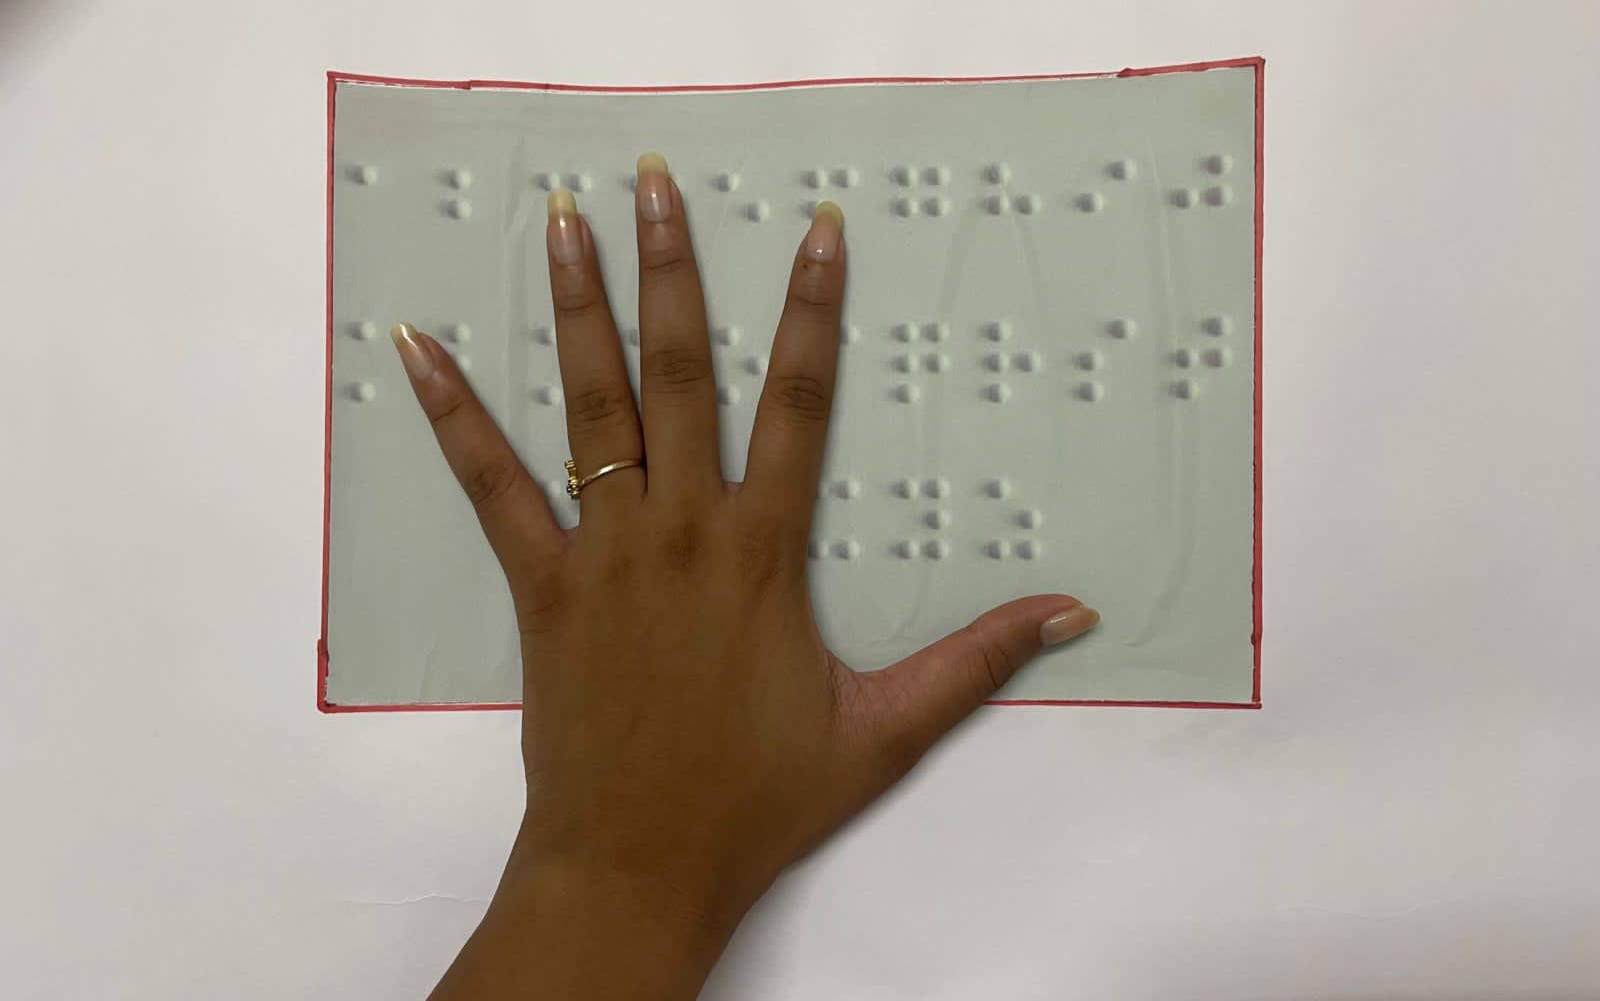

In [10]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp

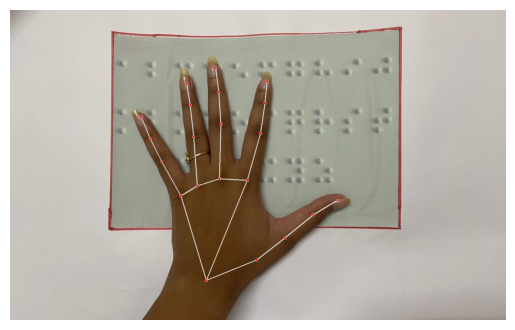

In [13]:
def detect_and_display_hand(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Initialize MediaPipe hands module
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe hands
    results = hands.process(image_rgb)

    # Import mediapipe drawing utilities
    mp_drawing = mp.solutions.drawing_utils  # Import mediapipe drawing utilities

    # Draw hand landmarks on the image
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Release resources
    hands.close()

    # Display the image with detected hand using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Path to the image file
image_path = 'test_img.jpg'

# Call the function to detect hand and display the image
detect_and_display_hand(image_path)


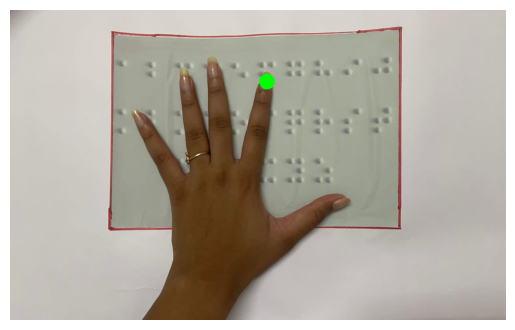

In [20]:
def detect_and_display_index_finger(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Initialize MediaPipe hands module
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe hands
    results = hands.process(image_rgb)

    # Import mediapipe drawing utilities
    mp_drawing = mp.solutions.drawing_utils

    # Draw index finger landmark on the image
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
        index_finger_landmark = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
        height, width, _ = image.shape
        x, y = int(index_finger_landmark.x * width), int(index_finger_landmark.y * height)
        cv2.circle(image, (x, y), 25, (0, 255, 0), -1)  # Increase the radius to 10 pixels

    # Release resources
    hands.close()

    # Display the image with detected index finger using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Path to the image file
image_path = 'test_img.jpg'

# Call the function to detect and display the index finger
detect_and_display_index_finger(image_path)

In [21]:
import cv2
import mediapipe as mp

def get_index_finger_location(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Initialize MediaPipe hands module
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe hands
    results = hands.process(image_rgb)

    # Get index finger landmark location
    index_finger_location = None
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
        index_finger_landmark = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
        height, width, _ = image.shape
        x, y = int(index_finger_landmark.x * width), int(index_finger_landmark.y * height)
        index_finger_location = (x, y)

    # Release resources
    hands.close()

    return index_finger_location

def save_location_to_txt(location, txt_file):
    # Save location to text file
    with open(txt_file, 'w') as file:
        file.write(f'Index Finger Location: {location[0]}, {location[1]}')

# Path to the image file
image_path = 'test_img.jpg'

# Get index finger location
index_finger_location = get_index_finger_location(image_path)

if index_finger_location is not None:
    # Save location to text file
    save_location_to_txt(index_finger_location, 'index_finger_location.txt')
